In [4]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, [0, 2]] #длина чашелистика, длина лепестка
y = iris.target

# Training classifiers
clf1 = KNeighborsClassifier(n_neighbors=7)
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier(max_depth=2)
clf4 = DecisionTreeClassifier(max_depth=4)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

[[3.3 3.4 3.5 ... 8.6 8.7 8.8]
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]
 ...
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]]


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
(0, 0)
(0, 1)
(1, 0)
(1, 1)


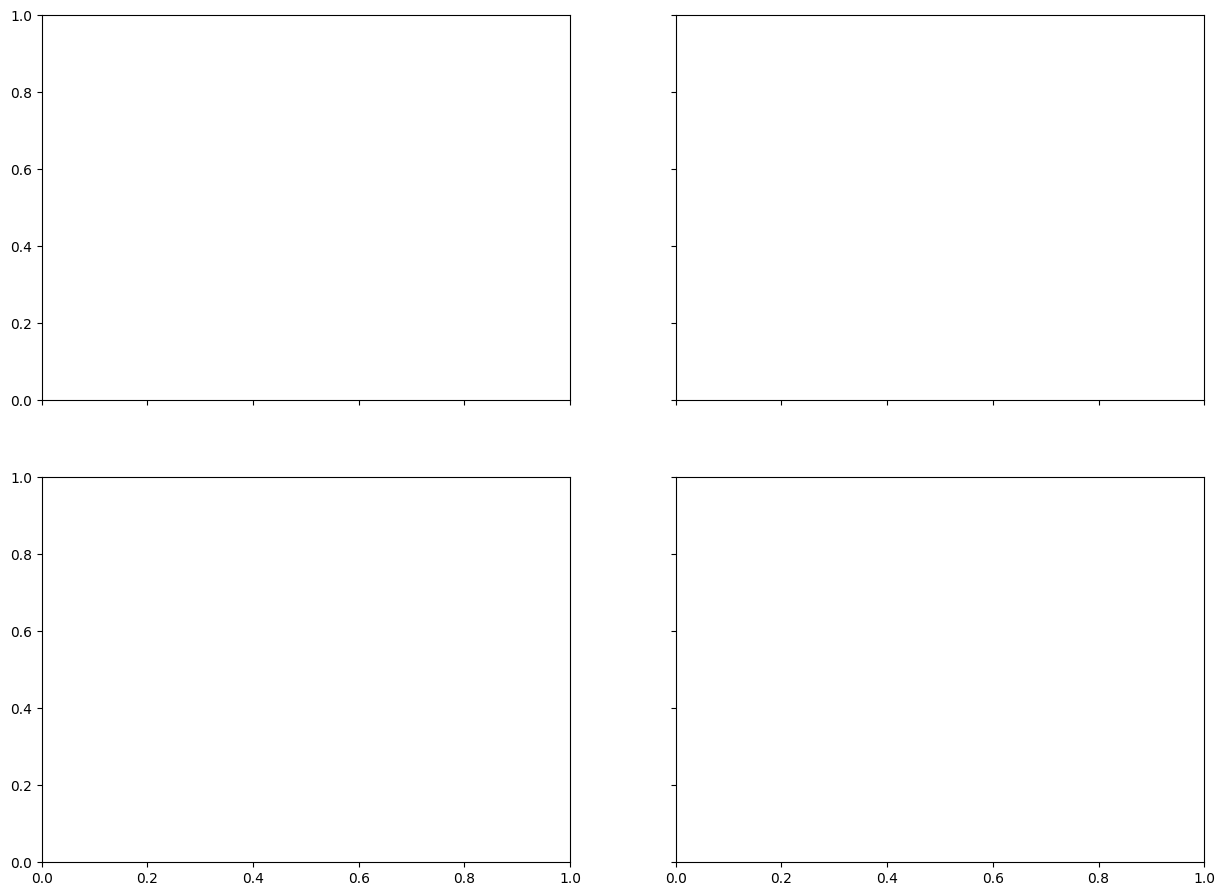

In [2]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15, 11))
print(axarr)
for n in product([0,1],[0,1]): #декартово произведение
    print(n)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


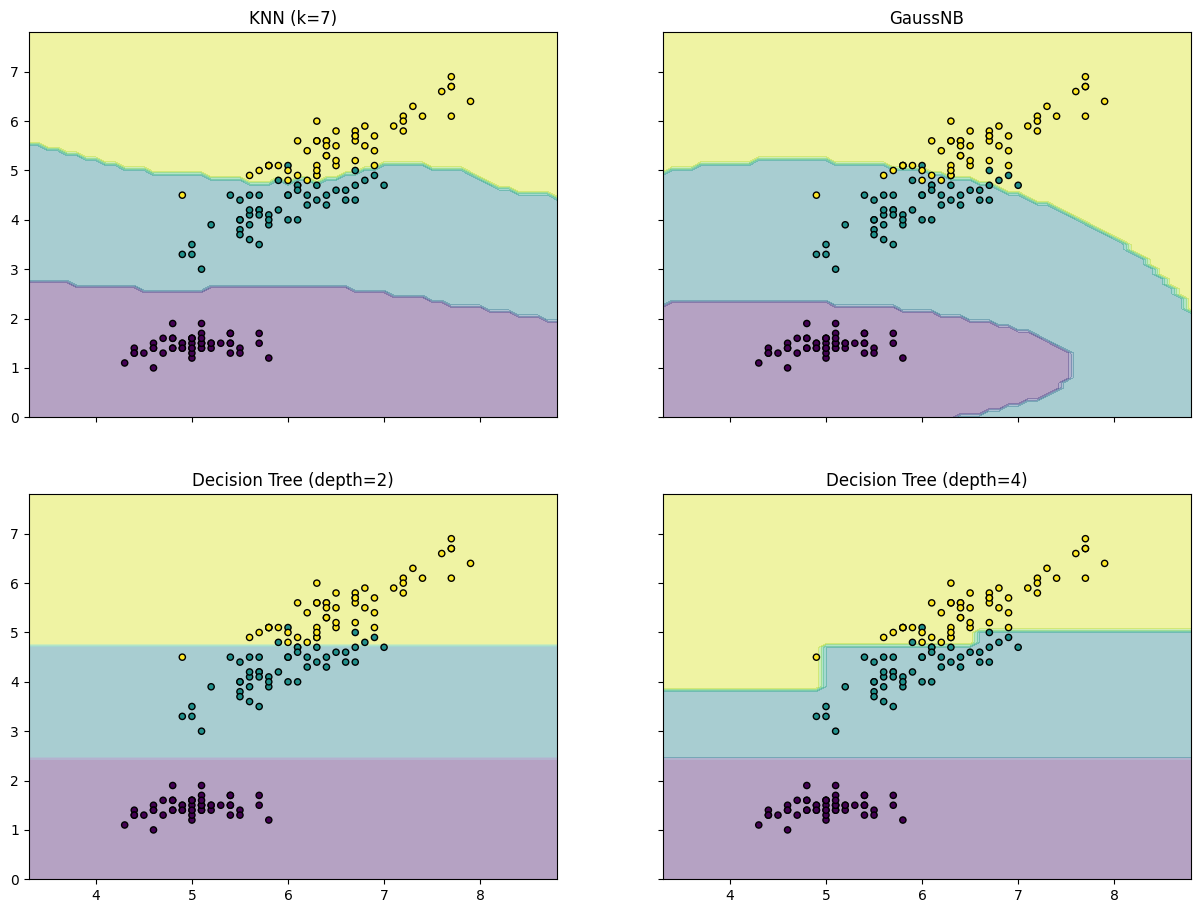

In [3]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15, 11))
for idx, clf, tt in zip(product([0,1],[0,1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN (k=7)', 'GaussNB', 'Decision Tree (depth=2)', 
                         'Decision Tree (depth=4)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)#f - filled contour
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [ ]:
def PlotResultRegion(clf, X, y, h=0.1): #X-двумерный массив
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                     np.arange(x1_min, x1_max, h))
    Z = clf.predict(np.c_[xx0.ravel(), xx1.ravel()])#Z - вектор
    Z = Z.reshape(xx0.shape)#Z - матрица размерности xx0
    cs = plt.contourf(xx0, xx1, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show()

